# Stats Module

The [Wikipedia notebook](wiki_data_combine.ipynb) was our starting point and the [World Bank notebook](WB.ipynb) added data to it and finalised the DataFrame we are using in this notebook.

## Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
import random
df = pd.read_csv('./data/finaldf.csv',index_col=0)
plt.style.use('fivethirtyeight')

In [2]:
df

,country,happiness,GDP_per_capita,social_support,healthy_life_exp,freedom,generosity,corruption,alcohol_consumption,cigarette_consumption,...,latitude,Access to internet (% age 15+),"Access to internet, female (% age 15+)","Access to internet, male (% age 15+)","Access to internet, income, poorest 40% (% age 15+)","Access to internet, income, richest 60% (% age 15+)",Access to internet (% ages 15-34),Access to internet (% ages 35-59),Access to internet (% age 60+),continent
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,12.3,1098.8,...,60.16080,91.492410,88.838040,94.352520,86.586430,94.761090,99.26421,97.733920,78.803990,Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,11.4,1298.0,...,55.67630,92.331520,89.203510,95.526910,88.256040,95.045990,99.49481,98.093170,77.035940,Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.7,552.8,...,59.91380,95.795970,95.889020,95.703790,94.078900,96.939320,100.00000,97.917570,88.694240,Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.1,848.1,...,64.13530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9.9,1459.9,...,52.37380,91.965280,90.310570,93.652470,92.005390,91.938610,100.00000,96.294080,77.611290,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,0.3,423.8,...,15.35200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,9.8,94.0,...,-1.95325,11.482790,8.280919,15.106390,5.251483,15.635840,16.32759,4.351039,1.870723,Africa
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,7.7,181.8,...,-6.17486,18.970620,13.864560,24.301670,10.125620,24.826540,25.42404,11.978890,2.366465,Africa
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0.7,311.6,...,34.52280,14.809090,4.882765,24.620600,9.009466,18.669010,18.33455,9.081439,7.316440,Asia


/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


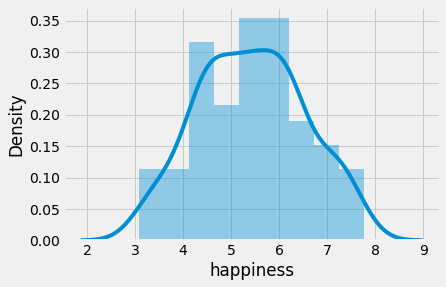

In [3]:
sns.distplot(df['happiness'], bins = 'auto')
plt.show()

Defining a function to generate graphs consistently:

In [4]:
def scatter_plot_against_happiness(
    columns, limit_by_new_variable = 0, common_xlabel = '', my_alpha = 1, dataframe = df
    ):
    if limit_by_new_variable > 0:
        chart_df = dataframe[dataframe[columns[0]]< limit_by_new_variable]
    else:
        chart_df = dataframe
    plt.figure(figsize = (8,8))
    
    if len(columns) == 1:
        plt.scatter(y = chart_df['happiness'], x = chart_df[columns[0]], alpha = my_alpha)
        plt.xlabel(columns[0])
    else:
        for i in range(0, len(columns)):
            plt.scatter(y = chart_df['happiness'], x = chart_df[columns[i]], label = columns[i], alpha = my_alpha)
        plt.xlabel(common_xlabel)
    
    if len(columns)> 1:
        plt.legend()
    plt.ylabel('happiness')
    plt.show()

## Question 1 - Does high life expectancy make one happy? 

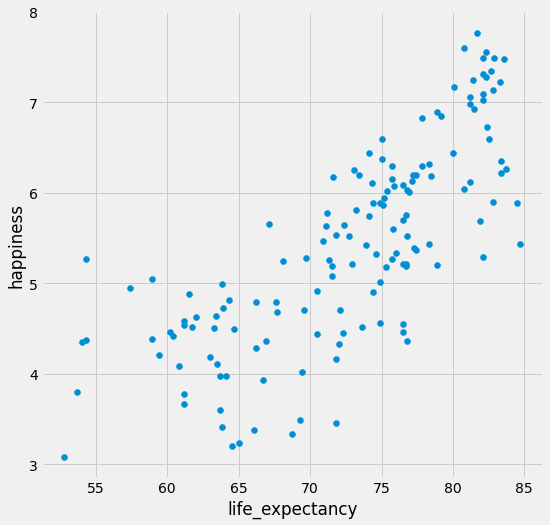

In [5]:
scatter_plot_against_happiness(['life_expectancy'])

H0: there is no linear relationship between happiness and life_expectancy, no variance of happiness can be explained by life_expectancy
<br>
H1: there is relationship
<br>
alpha significance level = 5%

In [6]:
f = 'happiness~life_expectancy'
model = ols(formula=f, data=df).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.40e-29
Time:                        23:27:48   Log-Likelihood:                -159.08
No. Observations:                 147   AIC:                             322.2
Df Residuals:                     145   BIC:                             328.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5017      0.555     -4.504      0.000      -3.600      -1.404
life_expectancy     0.1090      0.008     14.334      0.000       0.094       0.124
==============================================================================
Omnibus:                        3.291   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.242
Skew:                          -0.316   Prob(JB):                        0.198
Kurtosis:                       2.641   Cond. No.                         684.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Happiness')

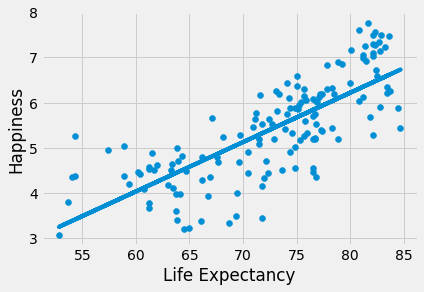

In [8]:
plt.scatter(y = df['happiness'], x = df['life_expectancy'])
plt.plot(df['life_expectancy'], model.params.Intercept + model.params.life_expectancy*df['life_expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness')

**Conclusion:** as p-value < alpha (5%), we reject the nullhypothesis.

There is a 0.000% chance of obtaining this data, assuming our null hypothesis (no relationship) is true. 

We can also check which countries are outliers from this perspective, as in, which countries have the largest difference between actual and model-estimated happiness?

In [9]:
df['happiness_est_lifeexp'] = model.predict(df['life_expectancy'])

In [10]:
df['happiness_est_lifeexp_diff'] = df['happiness'] - df['happiness_est_lifeexp']

In [11]:
df.sort_values('happiness_est_lifeexp_diff').head(10)

,country,happiness,GDP_per_capita,social_support,healthy_life_exp,freedom,generosity,corruption,alcohol_consumption,cigarette_consumption,...,"Access to internet, female (% age 15+)","Access to internet, male (% age 15+)","Access to internet, income, poorest 40% (% age 15+)","Access to internet, income, richest 60% (% age 15+)",Access to internet (% ages 15-34),Access to internet (% ages 35-59),Access to internet (% age 60+),continent,happiness_est_lifeexp,happiness_est_lifeexp_diff
148,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,1.2,2291.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,5.325065,-1.863065
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,9.8,94.0,...,8.280919,15.10639,5.251483,15.63584,16.32759,4.351039,1.870723,Africa,4.987139,-1.653139
147,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,8.4,433.5,...,29.746090,48.23803,23.278100,47.89257,54.73755,20.884610,5.397839,Africa,5.052544,-1.564544
129,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047,3.7,254.6,...,20.537070,35.15919,17.364480,33.77903,50.15553,17.363140,5.604608,Asia,5.870107,-1.504107
123,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,1.5,1580.0,...,42.792430,44.58137,21.026600,58.73451,69.34967,31.539620,6.187780,Africa,5.837405,-1.376405
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,7.7,181.8,...,13.864560,24.30167,10.125620,24.82654,25.42404,11.978890,2.366465,Africa,4.583808,-1.352808
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0.7,311.6,...,4.882765,24.62060,9.009466,18.66901,18.33455,9.081439,7.316440,Asia,4.529304,-1.326304
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,0.3,423.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,4.703717,-1.323717
75,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,NaN,NaN,...,77.311640,86.22300,65.277970,91.99744,98.24835,88.435180,37.022510,Asia,6.731273,-1.301273
116,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125,1.0,936.5,...,71.159430,65.78680,58.112290,75.43249,81.45134,58.381460,39.066660,Asia,5.837405,-1.289405


The countries above are the top 10 ones which we would __expect to be more__ happy, based on the life expectancy.

In [12]:
df[df['happiness_est_lifeexp_diff'].notnull()].sort_values('happiness_est_lifeexp_diff').tail(10)

,country,happiness,GDP_per_capita,social_support,healthy_life_exp,freedom,generosity,corruption,alcohol_consumption,cigarette_consumption,...,"Access to internet, female (% age 15+)","Access to internet, male (% age 15+)","Access to internet, income, poorest 40% (% age 15+)","Access to internet, income, richest 60% (% age 15+)",Access to internet (% ages 15-34),Access to internet (% ages 35-59),Access to internet (% age 60+),continent,happiness_est_lifeexp,happiness_est_lifeexp_diff
128,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045,9.3,468.6,...,6.957528,15.60026,6.896648,13.79855,15.476570,6.767400,0.284895,Africa,3.417418,0.956582
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.1,848.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,6.535058,0.958942
131,Chad,4.350,0.350,0.766,0.192,0.174,0.198,0.078,4.4,279.3,...,2.307314,12.67997,2.395766,10.67106,8.418994,5.516834,6.154569,Africa,3.384716,0.965284
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9.9,1459.9,...,90.310570,93.65247,92.005390,91.93861,100.000000,96.294080,77.611290,Europe,6.447852,1.040148
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.7,552.8,...,95.889020,95.70379,94.078900,96.93932,100.000000,97.917570,88.694240,Europe,6.469653,1.084347
95,Cameroon,5.044,0.549,0.910,0.331,0.381,0.187,0.037,8.4,171.0,...,23.735730,31.11921,13.016430,36.94839,33.404200,18.723950,8.939283,Africa,3.918857,1.125143
98,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090,6.0,352.7,...,19.886470,31.58410,15.532540,32.92999,32.515780,18.202630,7.955625,Africa,3.755344,1.188656
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,11.4,1298.0,...,89.203510,95.52691,88.256040,95.04599,99.494810,98.093170,77.035940,Europe,6.306141,1.293859
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,12.3,1098.8,...,88.838040,94.35252,86.586430,94.76109,99.264210,97.733920,78.803990,Europe,6.404248,1.364752
84,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041,10.1,162.5,...,19.093900,35.41185,19.999590,32.43669,35.229300,19.636010,4.158126,Africa,3.417418,1.847582


The countries above are the top 10 ones which we would __expect to be less__ happy, based on the life expectancy. 

In [13]:
fig = px.scatter(df, x="happiness",
                 y="happiness_est_lifeexp_diff",
                 hover_name="country",
                 hover_data=['life_expectancy']
                )
fig.show()

### Question 1 Extra - Does log life expectancy work better? 

In [14]:
df['log_life_exp'] = df['life_expectancy'].apply(lambda x: np.log(x))

In [15]:
f = 'happiness~log_life_exp'
model = ols(formula=f, data=df).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           8.40e-28
Time:                        23:27:49   Log-Likelihood:                -163.21
No. Observations:                 147   AIC:                             330.4
Df Residuals:                     145   BIC:                             336.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -26.3984      2.331    -11.323      0.000     -31.006     -21.790
log_life_exp     7.4344      0.545     13.650      0.000       6.358       8.511
==============================================================================
Omnibus:                        2.125   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                2.168
Skew:                          -0.255   Prob(JB):                        0.338
Kurtosis:                       2.693   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Happiness')

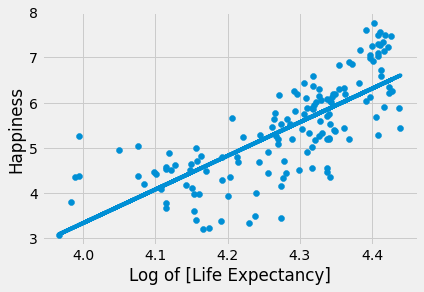

In [17]:
plt.scatter(y = df['happiness'], x = df['log_life_exp'])
plt.plot(df['log_life_exp'], model.params.Intercept + model.params.log_life_exp*df['log_life_exp'])
plt.xlabel('Log of [Life Expectancy]')
plt.ylabel('Happiness')

**Conclusion:** the logarithmic scale does not seem to be a better fit, even though we think the chart suggests it.

## Question 2 - Where are people happier? In a republic or in a constitutional monarchy?

In [18]:
df['const_form'].value_counts()

Republic                   122
Constitutional monarchy     22
Absolute monarchy            4
Name: const_form, dtype: int64

In [19]:
republic_happiness = df[df['const_form'] == 'Republic']['happiness']
monarchy_happiness = df[
    (df['const_form'] == 'Constitutional\xa0monarchy') | \
    (df['const_form'] == 'Absolute\xa0monarchy')] ['happiness']

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



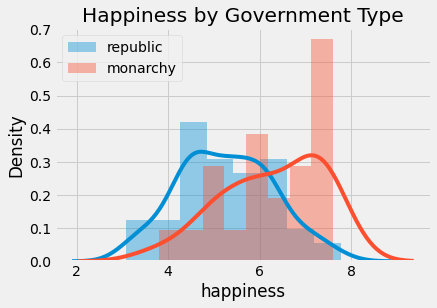

In [20]:
sns.distplot(republic_happiness, bins = 8, label = 'republic')
sns.distplot(monarchy_happiness, bins = 8, label = 'monarchy')
plt.legend()
plt.title('Happiness by Government Type')
plt.show()

This graph shows 2 populations: one where the government system is republic, and the other which is operated by a monarchy. 
<br>
H0: the mean of the two populations are the same
<br>
H1: the mean is not the same
<br>
alpha: 5%

In [21]:
def welch_t(a, b):
    """
    Returns Welch's t-statistics for population a and b. 
    """
    numerator = a.mean() - b.mean()
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return numerator/denominator


def welch_df(a, b):
    """
    Returns degrees of freedom for Welch's test. 
    """
    numerator = (a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)**2
    denominator =  (a.var(ddof=1) ** 2 / (a.size**2 * (a.size-1))) + (b.var(ddof=1) ** 2 / (b.size**2 * (b.size-1)))
    
    return numerator/denominator


def p_value(a, b, two_sided=False):
    
    t = welch_t(a, b)
    df = welch_df(a, b)
    p = 1 - stats.t.cdf(t, df)
    
    if two_sided:
        return p*2
    else:
        return p

In [22]:
republic_happiness_sample = np.array(random.sample(list(republic_happiness), len(monarchy_happiness)))

In [23]:
p_value(republic_happiness_sample, monarchy_happiness, two_sided = False)

0.9971798306541114

This is expected of course, republic happiness is almost certainly lower than monarchy happiness. 

In [24]:
p_value(monarchy_happiness,republic_happiness_sample, two_sided = False)

0.002820169345888579

**Conclusion:** we reject the null hypothesis of those two population means being equal, the government type impacts happiness. 

## Question 3 - Where are people happier? In countries where the head of state has executive power, or if it is a ceremonial position? 

In [25]:
df['head_of_state'].value_counts()

Executive     95
Ceremonial    53
Name: head_of_state, dtype: int64

In [26]:
executive_happiness = df[df['head_of_state'] == 'Executive']['happiness']
ceremonial_happiness = df[df['head_of_state'] == 'Ceremonial']['happiness']

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



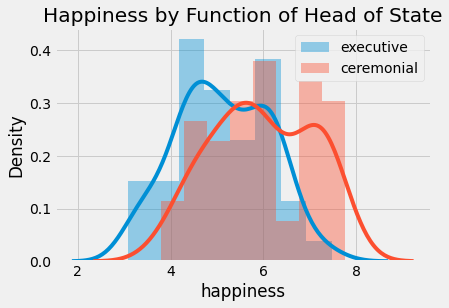

In [27]:
sns.distplot(executive_happiness, bins = 8, label = 'executive')
sns.distplot(ceremonial_happiness, bins = 8, label = 'ceremonial')
plt.legend()
plt.title('Happiness by Function of Head of State')
plt.show()

The two populations: happiness index in countries where head of state has executive power, and where the role is ceremonial. 
<br>
H0: the mean of the two populationr are the same
<br>
H1: the mean is not the same
<br>
alpha: 5%

In [28]:
p_value(ceremonial_happiness, executive_happiness, two_sided = False)

5.119538506126453e-06

**Conclusion:** We reject the null hypothesis, there is a 5.1e-06 chance of the observation assuming the nullhyp is true. 

In [29]:
# running it the other way just to check. 
p_value(executive_happiness, ceremonial_happiness, two_sided = False)

0.9999948804614938

## Question 4 - Is there a connection between median age and happiness? 

In [30]:
df.head()

,country,happiness,GDP_per_capita,social_support,healthy_life_exp,freedom,generosity,corruption,alcohol_consumption,cigarette_consumption,...,"Access to internet, male (% age 15+)","Access to internet, income, poorest 40% (% age 15+)","Access to internet, income, richest 60% (% age 15+)",Access to internet (% ages 15-34),Access to internet (% ages 35-59),Access to internet (% age 60+),continent,happiness_est_lifeexp,happiness_est_lifeexp_diff,log_life_exp
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,12.3,1098.8,...,94.35252,86.58643,94.76109,99.26421,97.73392,78.80399,Europe,6.404248,1.364752,4.403054
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,11.4,1298.0,...,95.52691,88.25604,95.04599,99.49481,98.09317,77.03594,Europe,6.306141,1.293859,4.391977
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.7,552.8,...,95.70379,94.07890,96.93932,100.00000,97.91757,88.69424,Europe,6.469653,1.084347,4.410371
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.1,848.1,...,NaN,NaN,NaN,NaN,NaN,NaN,Europe,6.535058,0.958942,4.417635
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9.9,1459.9,...,93.65247,92.00539,91.93861,100.00000,96.29408,77.61129,Europe,6.447852,1.040148,4.407938


In [31]:
df['median_age'].describe()

count    152.000000
mean      30.269079
std        9.092004
min       15.400000
25%       22.000000
50%       29.250000
75%       39.225000
max       47.300000
Name: median_age, dtype: float64

In [32]:
perc_25 = df['median_age'].quantile(q = 0.25)
perc_50 = df['median_age'].quantile(q = 0.50)
perc_75 = df['median_age'].quantile(q = 0.75)

In [33]:
def sort_median_age_group(median_age):
    if median_age < perc_25:
        return 1
    elif median_age < perc_50:
        return 2
    elif median_age < perc_75:
        return 3
    else:
        return 4
    

In [34]:
df['median_age_group'] = df['median_age'].apply(lambda x: sort_median_age_group(x))

In [35]:
formula = 'happiness ~ C(median_age_group)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq     df          F        PR(>F)
C(median_age_group)  88.806946    3.0  45.825875  5.256656e-21
Residual             95.604124  148.0        NaN           NaN


**Conclusion:**  We reject the null hypothesis (mean of happiness is same in all 4 groups) as p-value are really low.

### Bonus Question - Are there patterns with random per country variables?

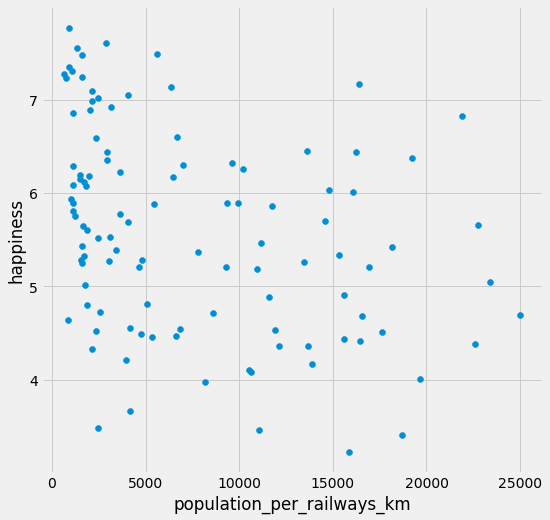

In [36]:
scatter_plot_against_happiness(['population_per_railways_km'], limit_by_new_variable = 25000)

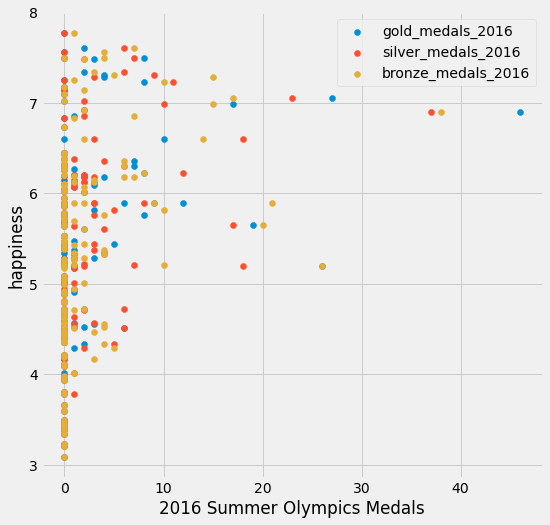

In [37]:
scatter_plot_against_happiness(['gold_medals_2016','silver_medals_2016', 'bronze_medals_2016'],
                               common_xlabel = '2016 Summer Olympics Medals'
                              )

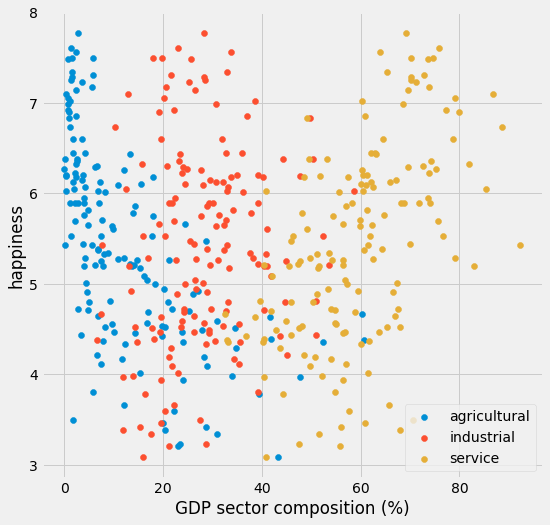

In [38]:
scatter_plot_against_happiness(['agricultural','industrial', 'service'],
                               common_xlabel = 'GDP sector composition (%)'
                              )

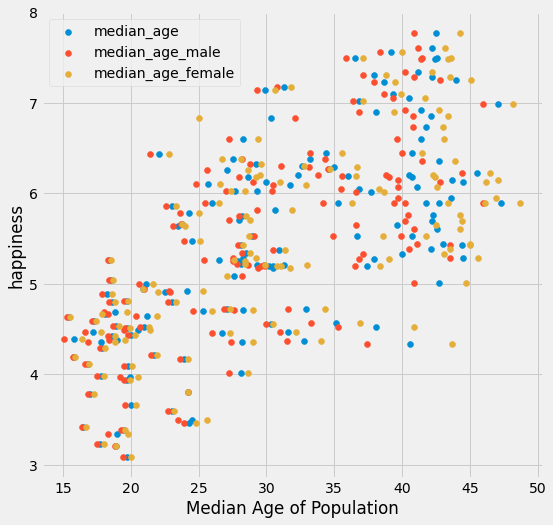

In [39]:
scatter_plot_against_happiness(['median_age','median_age_male', 'median_age_female'],
                               common_xlabel = 'Median Age of Population'
                              )

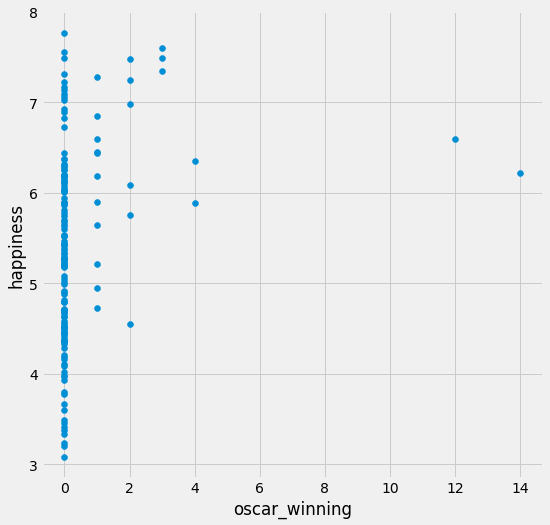

In [40]:
scatter_plot_against_happiness(['oscar_winning'])

In [41]:
# for cigarettes and alcohol, do a normalization first
df_temp = df[['country', 'happiness', 'alcohol_consumption', 'cigarette_consumption']].copy()

df_temp['alcohol_consumption'] = \
(df['alcohol_consumption'] - df['alcohol_consumption'].mean()) / df['alcohol_consumption'].std()

df_temp['cigarette_consumption'] = \
(df['cigarette_consumption'] - df['cigarette_consumption'].mean()) / df['cigarette_consumption'].std()

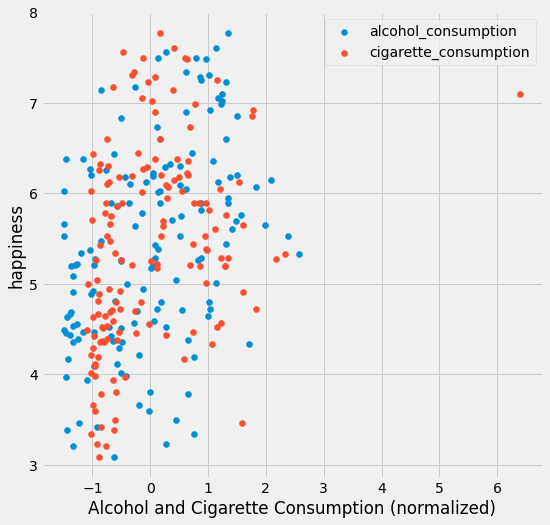

In [42]:
scatter_plot_against_happiness(['alcohol_consumption', 'cigarette_consumption'],
                               common_xlabel = 'Alcohol and Cigarette Consumption (normalized)',
                               dataframe = df_temp
                              )

## Question 5 - Is one's location impacting his happiness?

In [43]:
figsize = (12,12);
fig = px.box(df,
             x='continent',
             y='happiness',
             hover_data=['country'],
             color='continent'
            );
# fig.show();

![happiness_continent.png](./data/happiness_continent.png)

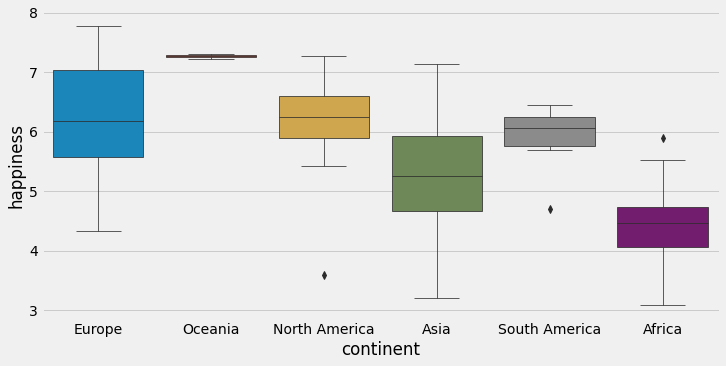

In [71]:
sns.catplot(x=df['continent'],
            y=df['happiness'],
            data=df,
            kind='box',
            aspect=2,
            linewidth=.75
            );

In [44]:
formula = "df['happiness'] ~ C(df['continent'])"
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq     df          F        PR(>F)
C(df['continent'])  91.633932    5.0  28.840196  2.860412e-20
Residual            92.777138  146.0        NaN           NaN


In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        df['happiness']   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     28.84
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           2.86e-20
Time:                        23:27:51   Log-Likelihood:                -178.16
No. Observations:                 152   AIC:                             368.3
Df Residuals:                     146   BIC:                             386.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.4027      0.120     36.636      0.000       4.165       4.640
C(df['continent'])[T.Asia]              0.8657      0.170      5.094      0.000       0.530       1.202
C(df['continent'])[T.Europe]            1.8758      0.175     10.699      0.000       1.529       2.222
C(df['continent'])[T.North America]     1.7520      0.252      6.962      0.000       1.255       2.249
C(df['continent'])[T.Oceania]           2.8648      0.576      4.971      0.000       1.726       4.004
C(df['continent'])[T.South America]     1.5175      0.279      5.434      0.000       0.966       2.069
==============================================================================
Omnibus:                        4.585   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.083
Skew:                          -0.367   Prob(JB):                        0.130
Kurtosis:                       3.328   Cond. No.                         9.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Based on these numbers, we can reject the null hypothesis and argue that the continent one lives in has an impact on his/her happiness.

### Would the GDP of a country have an effect on the happiness of its citizens?

In [46]:
figsize = (12,12);
fig = px.scatter(df,
                 y='happiness',
                 x='GDP per capita (current US$)',
                 labels={'x':'log of GDP per capita'},
                 hover_data = ['country'],
                 color = df['continent'],
                 marginal_x='histogram',
                 marginal_y='box'
                );
# fig.show();

![happiness_GDP.png](./data/happiness_GDP.png)

In [47]:
f = "happiness ~ df['GDP per capita (current US$)']"
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.12e-26
Time:                        23:27:51   Log-Likelihood:                -165.63
No. Observations:                 148   AIC:                             335.3
Df Residuals:                     146   BIC:                             341.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              4.8477      0.076     63.832      0.000       4.698       4.998
df['GDP per capita (current US$)']  3.774e-05   2.86e-06     13.199      0.000    3.21e-05    4.34e-05
==============================================================================
Omnibus:                        3.871   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.752
Skew:                          -0.389   Prob(JB):                        0.153
Kurtosis:                       2.957   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion:** Based on the p-value, we can reject the null hypothesis and state that the GDP of a country will have an effect on its citizen. However, the condition number is really high so could look at the log-scale:

1[

In [48]:
figsize = (12,12);
fig = px.scatter(df,
                 y='happiness',
                 x=np.log(df['GDP per capita (current US$)']),
                 labels={'x':'log of GDP per capita'},
                 hover_data = ['country'],
                 color = df['continent'],
                 marginal_x='histogram',
                 marginal_y='box'
                );
# fig.show();

![happiness_logGDP.png](./data/happiness_logGDP.png)

In [49]:
f = "happiness ~ np.log(df['GDP per capita (current US$)'])"
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     345.1
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           2.74e-40
Time:                        23:27:51   Log-Likelihood:                -133.98
No. Observations:                 148   AIC:                             272.0
Df Residuals:                     146   BIC:                             278.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.1774      0.288      0.617      0.538      -0.391       0.746
np.log(df['GDP per capita (current US$)'])     0.6063      0.033     18.577      0.000       0.542       0.671
==============================================================================
Omnibus:                        2.121   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.657
Skew:                          -0.187   Prob(JB):                        0.437
Kurtosis:                       3.359   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Log-scale doesn't seem to add anything to the analysis, the fit is not as good as with the 'raw' data plus the intercept has a really high p-value.

### Random charts from the EDA

In [50]:
figsize = (12,12);
fig = px.scatter(df,
                 y='happiness',
                 x=df['life_expectancy'],
                 hover_data = ['country'],
                 color = df.continent,
                 marginal_x='histogram',
                 marginal_y='box'
                );
# fig.show();

![happiness_lifeexpectancy.png](./data/happiness_lifeexpectancy.png)